## Import Libraries & Load Dataset

In [1]:
import pickle
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from perceptron import Perceptron
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("Dataset/weatherHistory.csv")
data.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


# Preprocess

In [3]:
data = data[["Formatted Date","Temperature (C)"]]
data["Formatted Date"] = pd.to_datetime(data["Formatted Date"],utc=True)
data.head()

,Formatted Date,Temperature (C)
0,2006-03-31 22:00:00+00:00,9.472222
1,2006-03-31 23:00:00+00:00,9.355556
2,2006-04-01 00:00:00+00:00,9.377778
3,2006-04-01 01:00:00+00:00,8.288889
4,2006-04-01 02:00:00+00:00,8.755556


In [4]:
data.rename(columns={"Formatted Date":"Date","Temperature (C)":"Temp"},inplace=True)

In [5]:
data["Year"] = data["Date"].dt.year
data["Day"] = data["Date"].dt.dayofyear
data.head()

,Date,Temp,Year,Day
0,2006-03-31 22:00:00+00:00,9.472222,2006,90
1,2006-03-31 23:00:00+00:00,9.355556,2006,90
2,2006-04-01 00:00:00+00:00,9.377778,2006,91
3,2006-04-01 01:00:00+00:00,8.288889,2006,91
4,2006-04-01 02:00:00+00:00,8.755556,2006,91


In [6]:
temp = data.groupby(["Year","Day"])["Temp"].mean().reset_index()
temp.head()

,Year,Day,Temp
0,2005,365,0.577778
1,2006,1,4.075000
2,2006,2,5.263194
3,2006,3,2.340509
4,2006,4,2.251852


Text(0, 0.5, 'Temp')

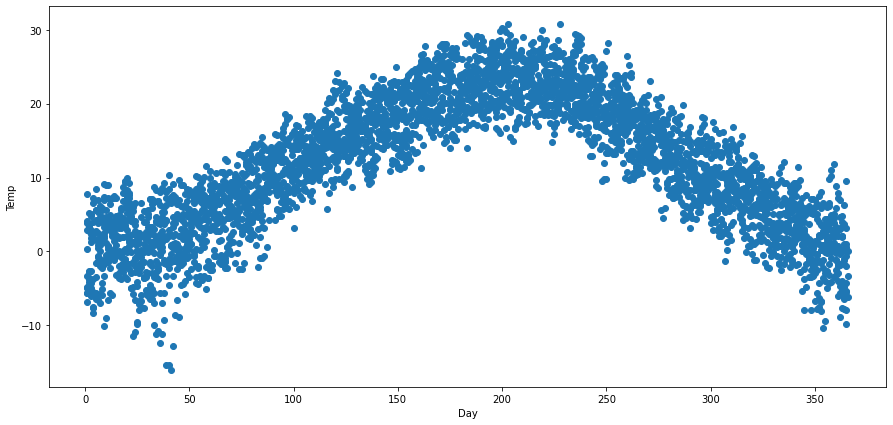

In [7]:
plt.figure(figsize=(15, 7))
plt.scatter(temp["Day"], temp["Temp"])
plt.xlabel("Day")
plt.ylabel("Temp")

In [8]:
X = temp[["Year","Day"]]
Y = temp["Temp"].values

In [9]:
Scale = StandardScaler()
X = Scale.fit_transform(X)

In [10]:
with open("StandardScaler","wb") as f:
    pickle.dump(Scale,f)

In [11]:
x_train , x_test , y_train , y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

# Model

### Perceptron

In [12]:
perceptron = Perceptron(learning_rate=0.1)
perceptron.fit(x_train,y_train)
y_pred = perceptron.predict(x_test)

In [13]:
perceptron.mean_absolute_error(y_test,y_pred)

7.937044024527992

### Multi Layer Perceptron

In [14]:
model = Sequential()
model.add(Dense(512,activation="relu",input_shape=(2,)))
model.add(Dense(256,activation="relu"))
model.add(Dense(128,activation="relu"))
model.add(Dense(64,activation="relu"))
model.add(Dense(1,activation="linear"))

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               1536      
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                                 
 dense_4 (Dense)             (None, 1)                 65        
                                                                 
Total params: 174,081
Trainable params: 174,081
Non-trainable params: 0
_________________________________________________________________


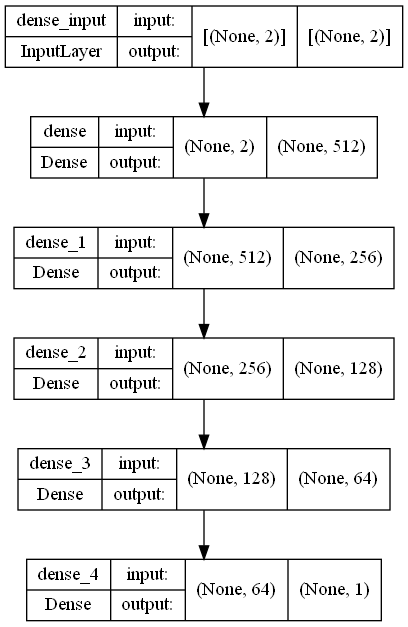

In [16]:
plot_model(model,show_shapes=True)

In [17]:
model.compile(optimizer="adam",loss="mean_absolute_error")
checkpoint = ModelCheckpoint("Weather_model.h5",monitor="val_loss",mode="min",save_best_only=True)

In [18]:
history = model.fit(x_train,y_train,epochs=2000,validation_data=(x_test,y_test),callbacks=[checkpoint])

Epoch 1/2000
101/101 [==============================] - 1s 4ms/step - loss: 8.1755 - val_loss: 4.4727
Epoch 2/2000
101/101 [==============================] - 0s 3ms/step - loss: 3.4247 - val_loss: 3.1508
Epoch 3/2000
101/101 [==============================] - 0s 3ms/step - loss: 3.1642 - val_loss: 3.2680
Epoch 4/2000
101/101 [==============================] - 0s 3ms/step - loss: 3.1131 - val_loss: 3.1592
Epoch 5/2000
101/101 [==============================] - 0s 3ms/step - loss: 3.0733 - val_loss: 3.1655
Epoch 6/2000
101/101 [==============================] - 0s 3ms/step - loss: 3.1095 - val_loss: 2.9913
Epoch 7/2000
101/101 [==============================] - 0s 3ms/step - loss: 3.0316 - val_loss: 3.1160
Epoch 8/2000
101/101 [==============================] - 0s 3ms/step - loss: 3.1410 - val_loss: 3.0836
Epoch 9/2000
101/101 [==============================] - 0s 3ms/step - loss: 3.0185 - val_loss: 3.0859
Epoch 10/2000
101/101 [==============================] - 0s 3ms/step - loss: 2.984

In [19]:
print("Loss: ",min(history.history["val_loss"]))

Loss:  1.82907235622406


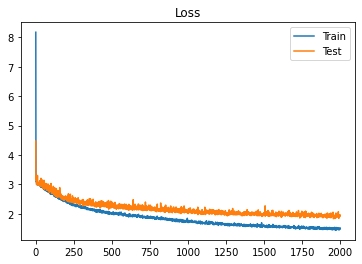

In [21]:
plt.plot(history.history["loss"],label="Train")
plt.plot(history.history["val_loss"],label="Test")
plt.title("Loss")
plt.legend()